##### Copyright 2019 The TensorFlow Authors. [Code cred](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=BPZ68wASog_I)

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

## Set up

Import TensorFlow and other libraries into your program to get started:

In [24]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

TensorFlow version: 2.15.0


## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [25]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Explore the Data

Open up variables on left. You should see:

*   There are 60,000 images in the training set
*   Each training image is 28x28 pixels
*   For each training image, there is an associated label (i.e. 60,000 labels)
*   There are 10,000 images in the test set
*   Each test image is 28x28 pixels
*   For each test image, there is an associated label (i.e. 10,000 labels)
*   The labels for each image are the values written in the image: 0, 1, 2, ... 9
*   The dataset is NOT in order.




View some of the training data

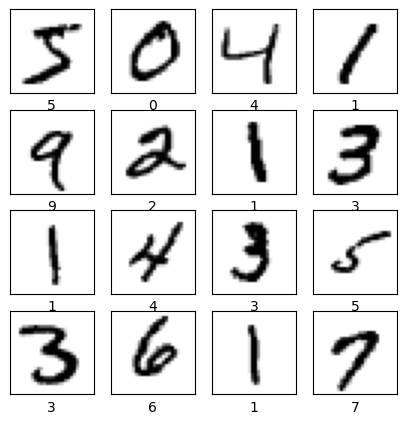

In [26]:
plt.figure(figsize=(5,5))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

View some of the test data



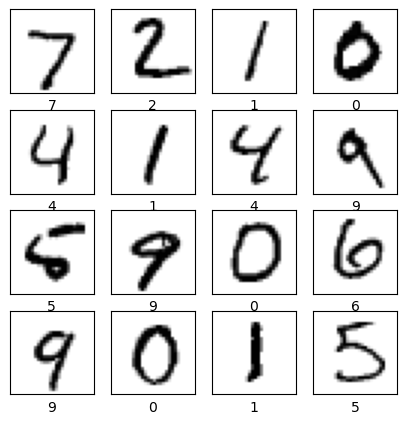

In [27]:
plt.figure(figsize=(5,5))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

## Build a machine learning model

### Set up the layers
The basic building block of a neural network is the [layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

Build a `tf.keras.Sequential` model:

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor (tensors are kind of like arrays).

This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the next layer of the network is a `tf.keras.layers.Dense`. This is a densely connected, or fully connected, neural layer. The first Dense layer has 128 nodes (or neurons).

The first dense layer is followed by `tf.keras.layers.Dropout`. Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer. When the accuracy on the test dataset is a little less than the accuracy on the training dataset, overfitting has occured. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. Adding a dropout layer can prevent overfitting.

The dropout layer is followed by another dense layer (also the last layer of the network). This layer returns a logits array (unnormalized log probabilities) with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Compile your model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

[Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

[Loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. Sparse Categorical Crossentropy computes the crossentropy loss between the labels and predictions.

[Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. The accuracy metric calculates how often predictions equal labels.

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train and evaluate your model

Training the neural network model requires the following steps:

*   Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
*   The model learns to associate images and labels.
*   You ask the model to make predictions about a test set—in this example, the test_images array.
*   Verify that the predictions match the labels from the test_labels array.

## Feed the model
*   To start training, call the `model.fit` method — so called because it "fits" the model to the training data by adjusting your model parameters and minimizing the loss:


In [30]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2962 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1431 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1076 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0873 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0750 - accuracy: 0.9770


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.98 (or 98%) on the training data.

The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [31]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0749 - accuracy: 0.9761 - 419ms/epoch - 1ms/step


[0.07491068542003632, 0.9761000275611877]

The image classifier is now trained to ~98% accuracy on this dataset.

## Make Predictions

Add a softmax layer to convert the logits output to more intuitive probability values. You may also hear this referred to as a "confidence value" since the softmax (and DNN) output array represents the model's "confidence" that the image corresponds to each of the 10 different digits.

Note: It is possible to bake a softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.



In [32]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

Run the test data through the trained DNN.

In [33]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 951us/step


Each DNN output node (remember: there are 10, 1 for each class) will display the probability that the image falls within a class. The label with the highest confidence value is the prediction from the DNN for a particular image. The sum of all 10 output probability values should be 1 or very close to it.

In [34]:
print("Probability Values = ", predictions[0])
print("Sum of Probability Values for one image = ", sum(predictions[0]))
print("Classification of Image is ", np.argmax(predictions[0]))

Probability Values =  [1.7410624e-06 2.6518285e-09 3.3664389e-06 2.2096962e-04 5.5619467e-11
 9.9241731e-07 8.6866105e-12 9.9977106e-01 4.9868385e-07 1.4464880e-06]
Sum of Probability Values for one image =  1.0000000759909964
Classification of Image is  7


## Analyze Results


In [35]:
from sklearn.metrics import classification_report
predictions2 = np.argmax(predictions, axis=1)

rpt = classification_report(test_labels, predictions2)
print(rpt)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [36]:
#setup plotting functions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Correct prediction labels are blue, incorrect prediction labels are red, confidence scores in between are gray. The number gives the percentage (out of 100) for the predicted label.

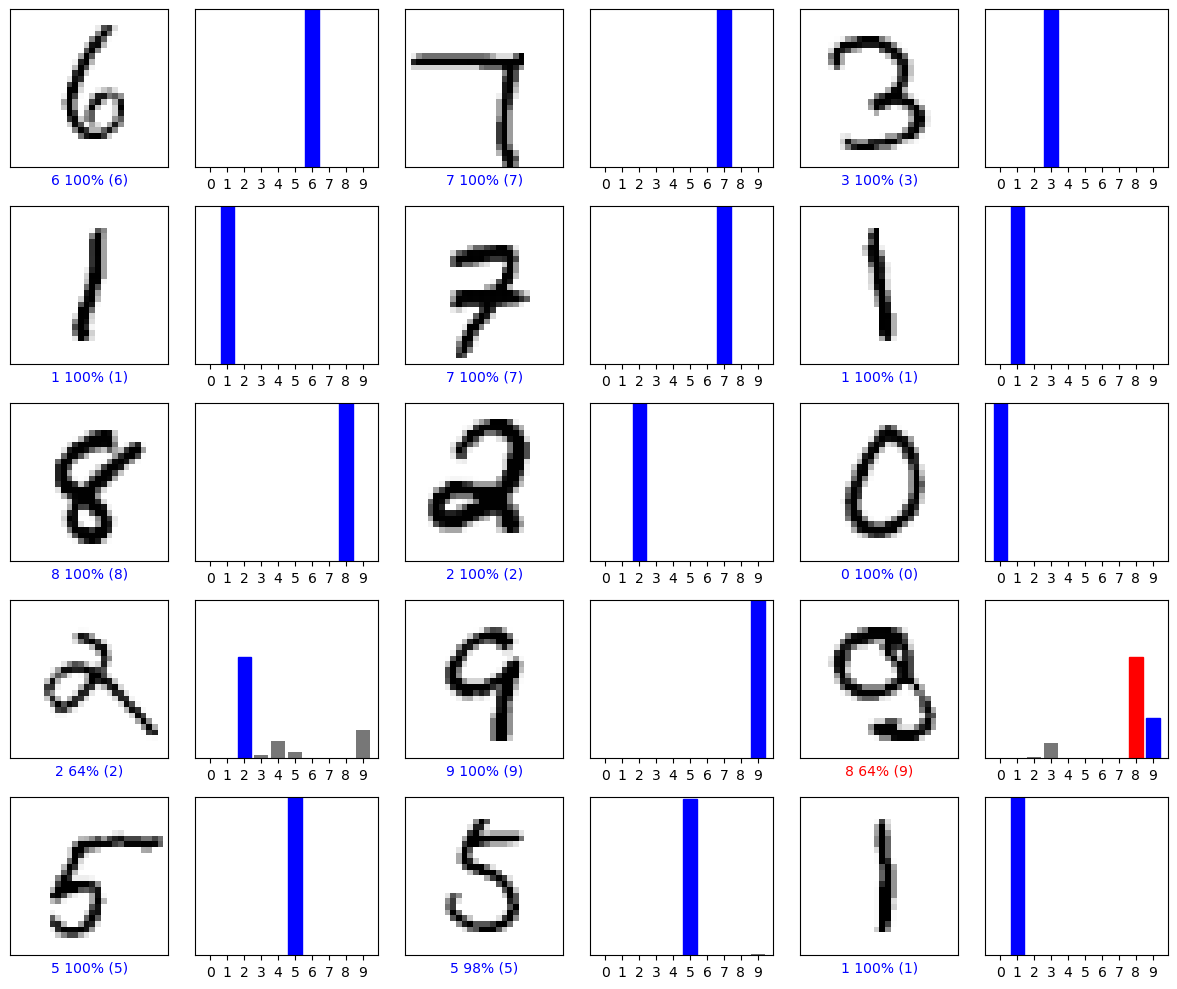

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
k=0
for i in range(140,155):
  plt.subplot(num_rows, 2*num_cols, 2*k+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*k+2)
  plot_value_array(i, predictions[i], test_labels)
  k=k+1
plt.tight_layout()
plt.show()